Tanmay Jagtap  
LGMVIP DataScience  
Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Short-Analysis

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [9]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [10]:
df.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data Visualization

The below pie-chart shows that the target data(setosa, versicolor, virginica) is equally balanced

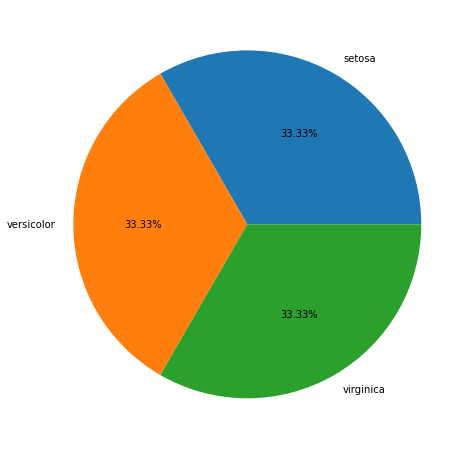

In [11]:
fig = plt.figure(figsize=(10, 8))
plt.pie(df['class'].value_counts(), labels = ['setosa', 'versicolor', 'virginica'], autopct='%1.2f%%')
plt.show()

Scatter graph

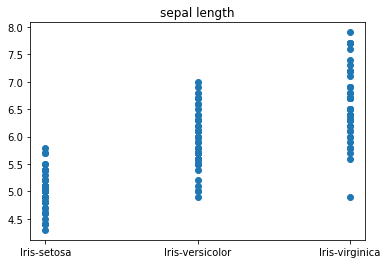

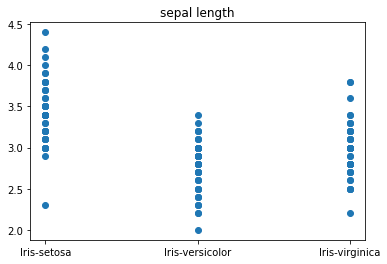

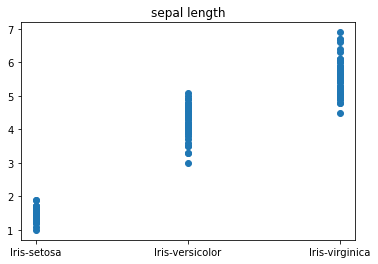

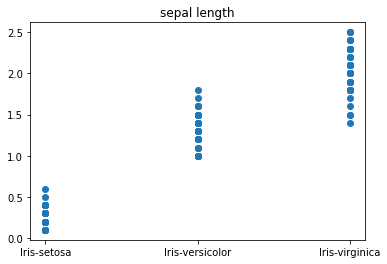

In [12]:
plt.scatter(df['class'],df['sepal length'])
plt.title('sepal length')
plt.show()

plt.scatter(df['class'],df['sepal width'])
plt.title('sepal length')
plt.show()

plt.scatter(df['class'],df['petal length'])
plt.title('sepal length')
plt.show()

plt.scatter(df['class'],df['petal width'])
plt.title('sepal length')
plt.show()

From above it is observed that the values lies in specific range according to the class

Scatter-Plot

C:\Users\jagta\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal width', ylabel='sepal length'>

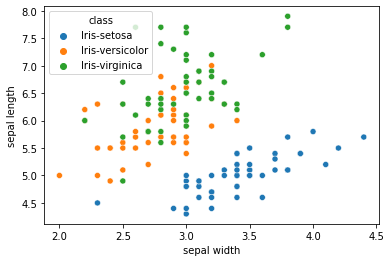

In [13]:
sns.scatterplot(df['sepal width'],df['sepal length'],hue = df['class'])

C:\Users\jagta\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal width', ylabel='petal length'>

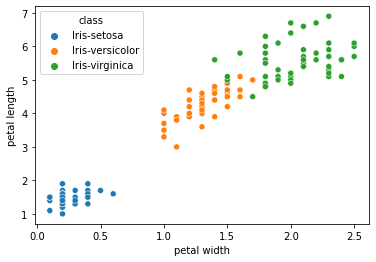

In [14]:
sns.scatterplot(df['petal width'],df['petal length'],hue = df['class'])

Box-Plot

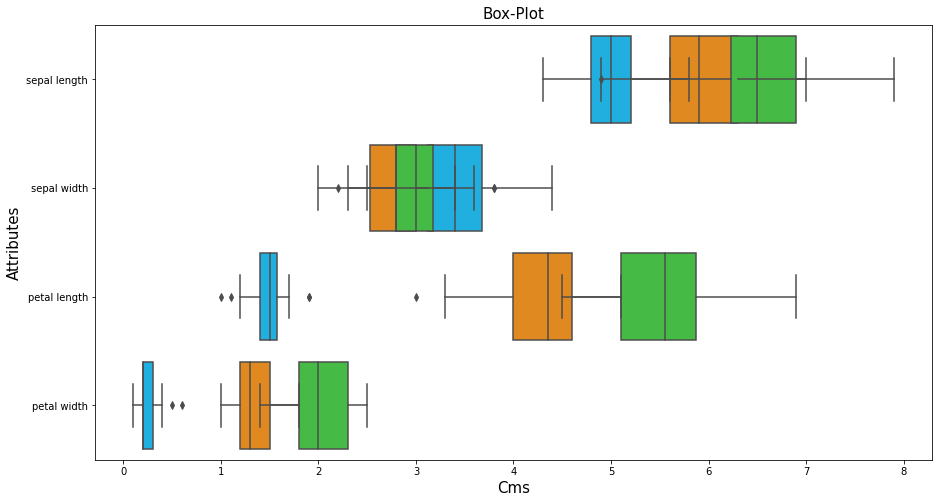

In [15]:
plt.figure(figsize=(15,8))

setosa = df[df['class'] == "Iris-setosa"]
bp = sns.boxplot(data = setosa, color='deepskyblue', orient="h")

versicolor = df[df['class'] == "Iris-versicolor"]
bp = sns.boxplot(data = versicolor, color='darkorange', orient = "h")

virginica = df[df['class'] == "Iris-virginica"]
bp = sns.boxplot(data = virginica, color='limegreen', orient="h")

plt.title('Box-Plot', fontsize = 15)
plt.xlabel('Cms', fontsize = 15)
plt.ylabel('Attributes', fontsize = 15)
plt.show()

Violin-Plot

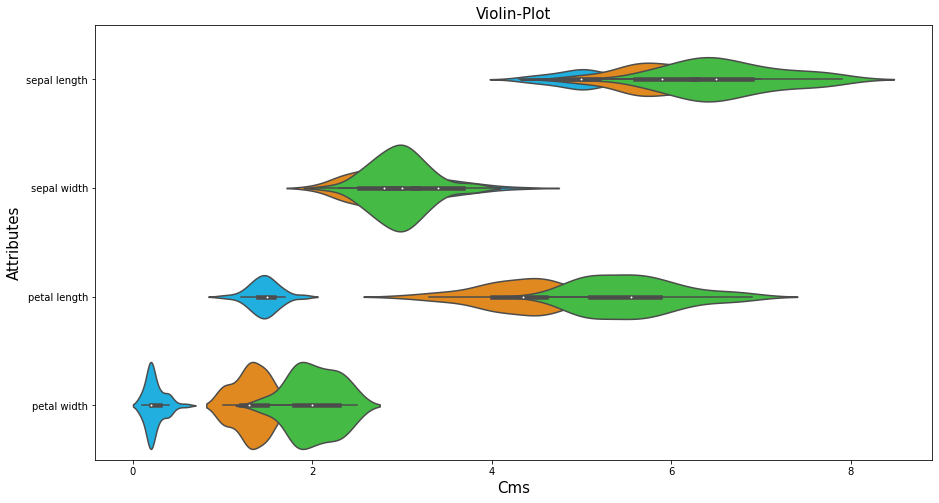

In [16]:
plt.figure(figsize=(15,8))

setosa = df[df['class'] == "Iris-setosa"]
vp = sns.violinplot(data = setosa, color='deepskyblue', orient="h")

versicolor = df[df['class'] == "Iris-versicolor"]
vp = sns.violinplot(data = versicolor, color='darkorange', orient = "h")

virginica = df[df['class'] == "Iris-virginica"]
vp = sns.violinplot(data = virginica, color='limegreen', orient="h")

plt.title('Violin-Plot', fontsize = 15)
plt.xlabel('Cms', fontsize = 15)
plt.ylabel('Attributes', fontsize = 15)
plt.show()

Point-Plot

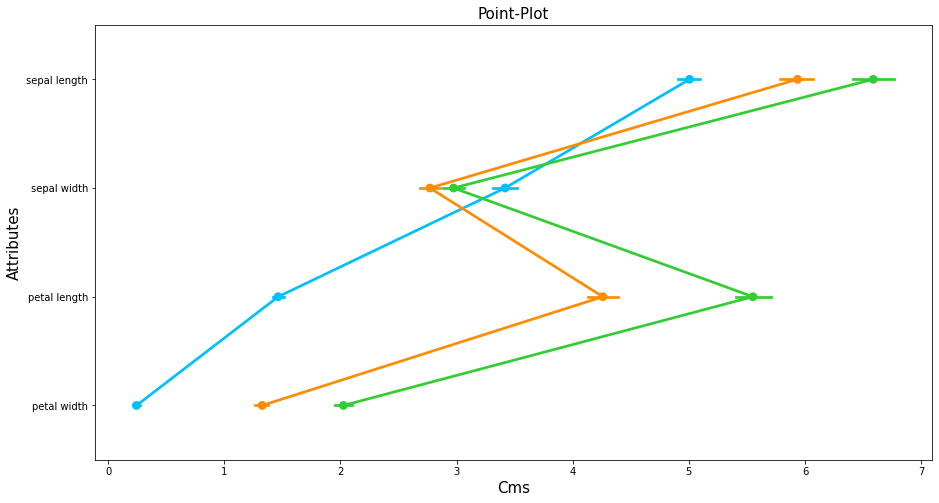

In [17]:
plt.figure(figsize=(15,8))

setosa = df[df['class'] == "Iris-setosa"]
pp = sns.pointplot(data = setosa, color='deepskyblue', orient="h")

versicolor = df[df['class'] == "Iris-versicolor"]
pp = sns.pointplot(data = versicolor, color='darkorange', orient = "h")

virginica = df[df['class'] == "Iris-virginica"]
pp = sns.pointplot(data = virginica, color='limegreen', orient="h")

plt.title('Point-Plot', fontsize = 15)
plt.xlabel('Cms', fontsize = 15)
plt.ylabel('Attributes', fontsize = 15)
plt.show()

Histogram

C:\Users\jagta\AppData\Local\Temp/ipykernel_4252/503563459.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = fig.gca(), color="orange", edgecolor="black")


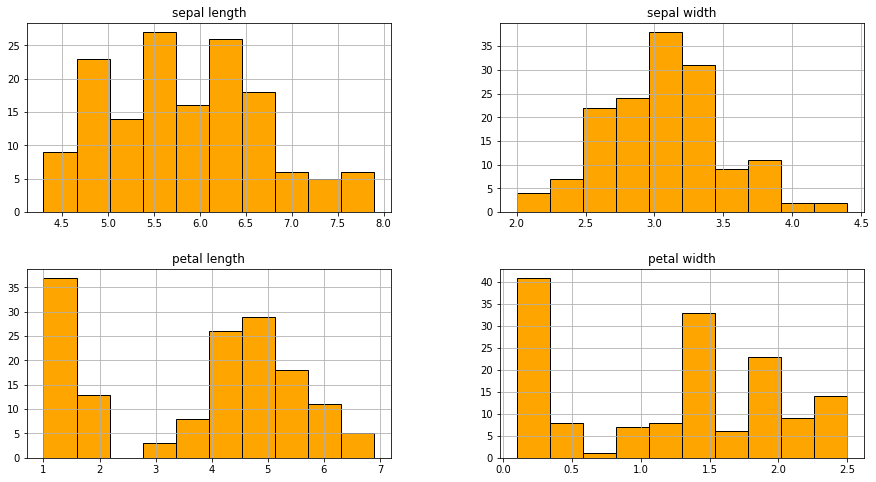

In [18]:
fig = plt.figure(figsize=(15, 8))
df.hist(ax = fig.gca(), color="orange", edgecolor="black")
plt.show()

Histogram w.r.t. Class

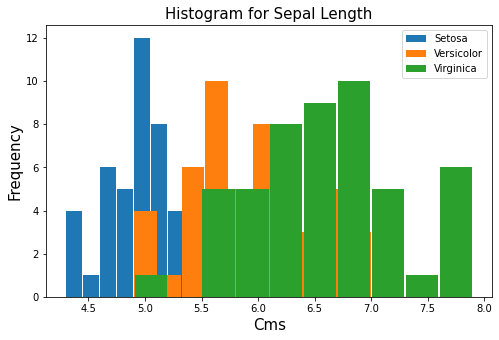

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df[df['class']=='Iris-setosa']['sepal length'],rwidth=0.95, label="Setosa")
plt.hist(df[df['class']=='Iris-versicolor']['sepal length'],rwidth=0.95, label="Versicolor")
plt.hist(df[df['class']=='Iris-virginica']['sepal length'],rwidth=0.95, label="Virginica")
plt.title('Histogram for Sepal Length', fontsize = 15)
plt.xlabel('Cms', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()
plt.show()

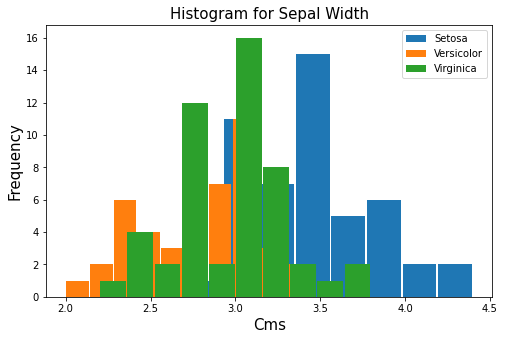

In [20]:
plt.figure(figsize=(8,5))
plt.hist(df[df['class']=='Iris-setosa']['sepal width'],rwidth=0.95, label="Setosa")
plt.hist(df[df['class']=='Iris-versicolor']['sepal width'],rwidth=0.95, label="Versicolor")
plt.hist(df[df['class']=='Iris-virginica']['sepal width'],rwidth=0.95, label="Virginica")
plt.title('Histogram for Sepal Width', fontsize = 15)
plt.xlabel('Cms', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()
plt.show()

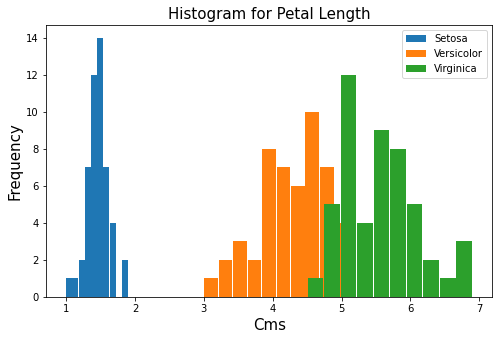

In [21]:
plt.figure(figsize=(8,5))
plt.hist(df[df['class']=='Iris-setosa']['petal length'],rwidth=0.95, label="Setosa")
plt.hist(df[df['class']=='Iris-versicolor']['petal length'],rwidth=0.95, label="Versicolor")
plt.hist(df[df['class']=='Iris-virginica']['petal length'],rwidth=0.95, label="Virginica")
plt.title('Histogram for Petal Length', fontsize = 15)
plt.xlabel('Cms', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()
plt.show()

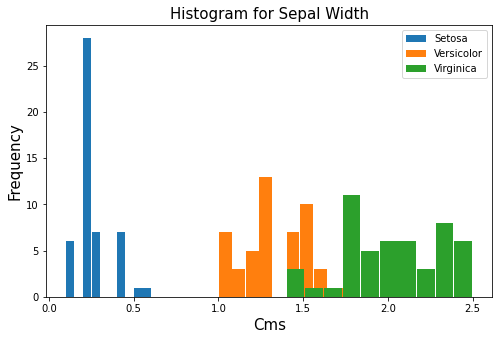

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df[df['class']=='Iris-setosa']['petal width'],rwidth=0.95, label="Setosa")
plt.hist(df[df['class']=='Iris-versicolor']['petal width'],rwidth=0.95, label="Versicolor")
plt.hist(df[df['class']=='Iris-virginica']['petal width'],rwidth=0.95, label="Virginica")
plt.title('Histogram for Sepal Width', fontsize = 15)
plt.xlabel('Cms', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend()
plt.show()

Plotting scatter graph to check relatation between Petal and sepal length and width

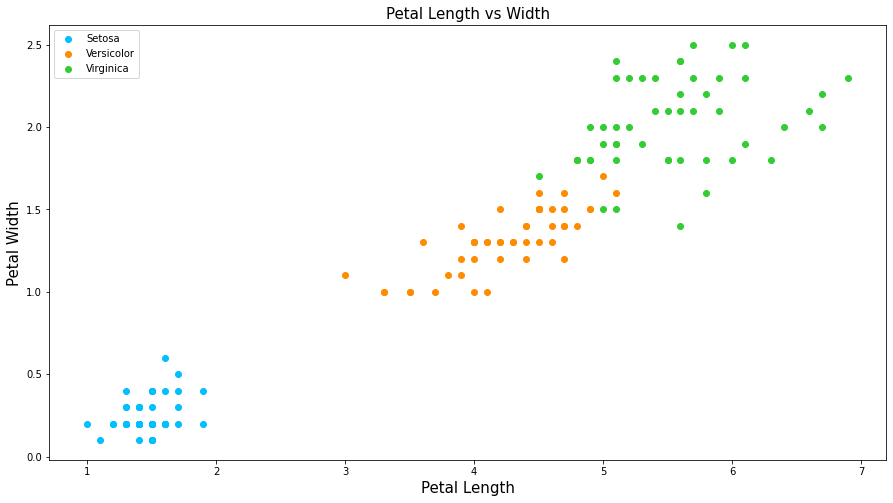

In [23]:
plt.figure(figsize=(15,8))
plt.scatter(setosa['petal length'], setosa['petal width'], color="deepskyblue", label="Setosa")
plt.scatter(versicolor['petal length'],versicolor['petal width'], color="darkorange", label="Versicolor")
plt.scatter(virginica['petal length'],virginica['petal width'], color="limegreen", label="Virginica")
plt.xlabel("Petal Length", fontsize=15)
plt.ylabel("Petal Width", fontsize=15)
plt.title("Petal Length vs Width", fontsize=15)
plt.legend()
plt.show()

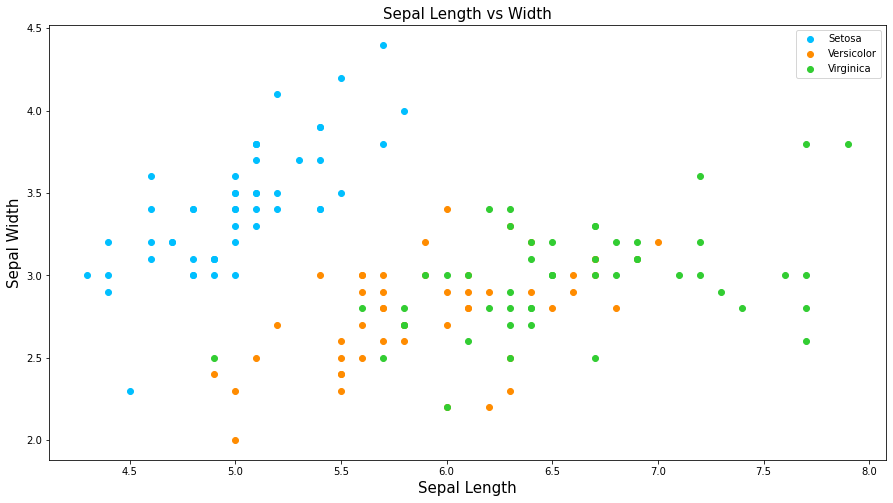

In [24]:
plt.figure(figsize=(15,8))
plt.scatter(setosa['sepal length'], setosa['sepal width'], color="deepskyblue", label="Setosa")
plt.scatter(versicolor['sepal length'],versicolor['sepal width'], color="darkorange", label="Versicolor")
plt.scatter(virginica['sepal length'],virginica['sepal width'], color="limegreen", label="Virginica")
plt.xlabel("Sepal Length", fontsize=15)
plt.ylabel("Sepal Width", fontsize=15)
plt.title("Sepal Length vs Width", fontsize=15)
plt.legend()
plt.show()

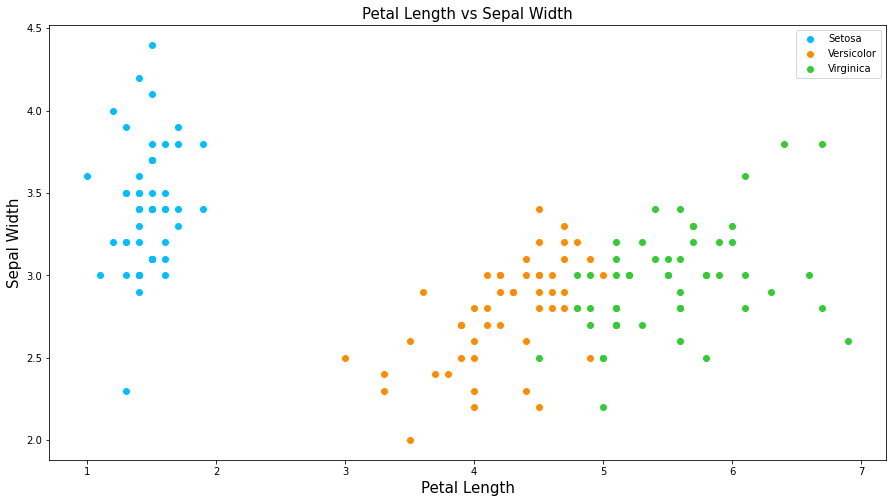

In [25]:
plt.figure(figsize=(15,8))
plt.scatter(setosa['petal length'], setosa['sepal width'], color="deepskyblue", label="Setosa")
plt.scatter(versicolor['petal length'],versicolor['sepal width'], color="darkorange", label="Versicolor")
plt.scatter(virginica['petal length'],virginica['sepal width'], color="limegreen", label="Virginica")
plt.xlabel("Petal Length", fontsize=15)
plt.ylabel("Sepal Width", fontsize=15)
plt.title("Petal Length vs Sepal Width", fontsize=15)
plt.legend()
plt.show()

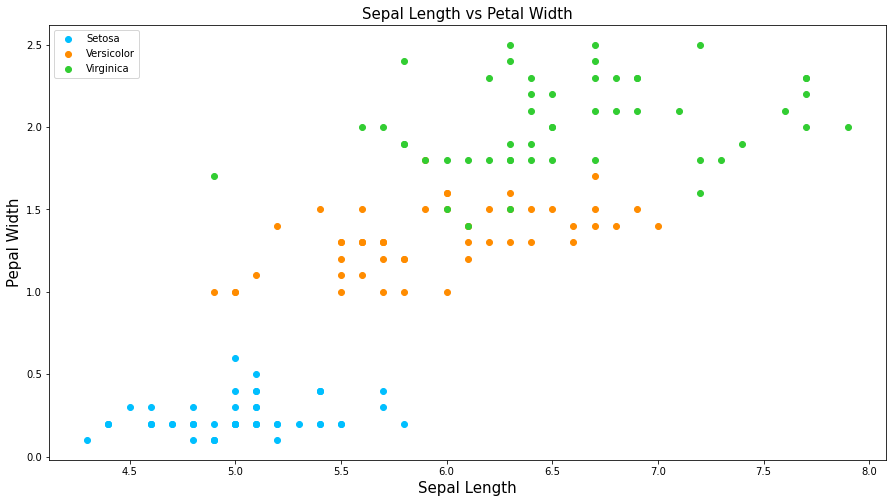

In [26]:
plt.figure(figsize=(15,8))
plt.scatter(setosa['sepal length'], setosa['petal width'], color="deepskyblue", label="Setosa")
plt.scatter(versicolor['sepal length'],versicolor['petal width'], color="darkorange", label="Versicolor")
plt.scatter(virginica['sepal length'],virginica['petal width'], color="limegreen", label="Virginica")
plt.xlabel("Sepal Length", fontsize=15)
plt.ylabel("Pepal Width", fontsize=15)
plt.title("Sepal Length vs Petal Width", fontsize=15)
plt.legend()
plt.show()

We can see that in all four plots data gets seperated according to their class

Pair-Plot

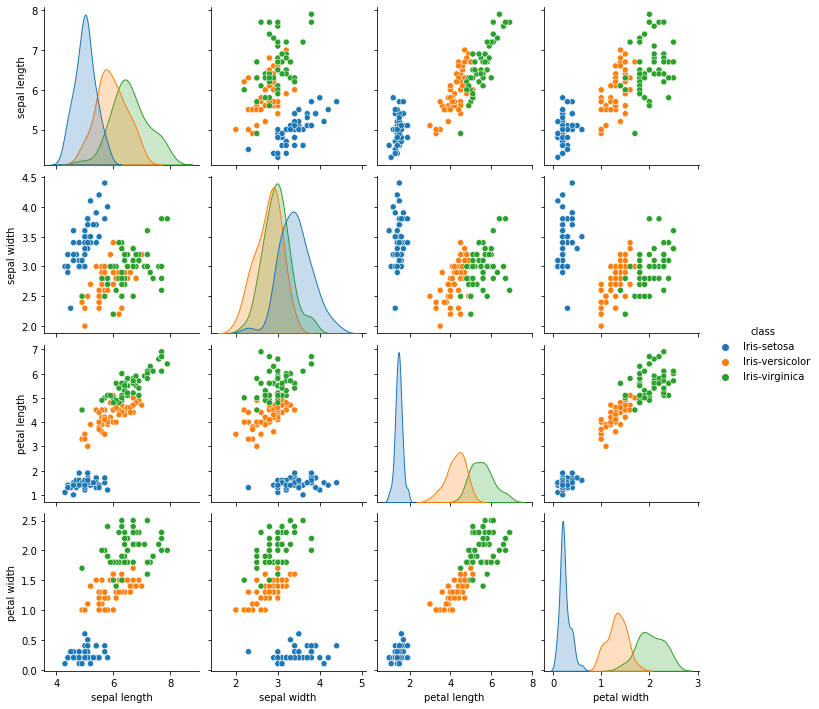

In [27]:
sns.pairplot(df, hue='class')

KDE-Plot

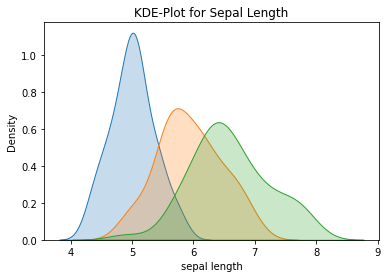

In [28]:
sns.kdeplot(df[df['class']=='Iris-setosa']['sepal length'], shade=True, label = 'setosa')
sns.kdeplot(df[df['class']=='Iris-versicolor']['sepal length'], shade=True, label = 'versicolor')
sns.kdeplot(df[df['class']=='Iris-virginica']['sepal length'], shade=True, label = 'virginica')
plt.title('KDE-Plot for Sepal Length')
plt.show()

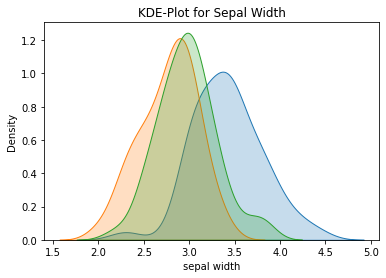

In [29]:
sns.kdeplot(df[df['class']=='Iris-setosa']['sepal width'], shade=True, label = 'setosa')
sns.kdeplot(df[df['class']=='Iris-versicolor']['sepal width'], shade=True, label = 'versicolor')
sns.kdeplot(df[df['class']=='Iris-virginica']['sepal width'], shade=True, label = 'virginica')
plt.title('KDE-Plot for Sepal Width')
plt.show()

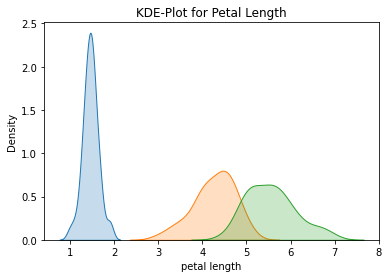

In [30]:
sns.kdeplot(df[df['class']=='Iris-setosa']['petal length'], shade=True, label = 'setosa')
sns.kdeplot(df[df['class']=='Iris-versicolor']['petal length'], shade=True, label = 'versicolor')
sns.kdeplot(df[df['class']=='Iris-virginica']['petal length'], shade=True, label = 'virginica')
plt.title('KDE-Plot for Petal Length')
plt.show()

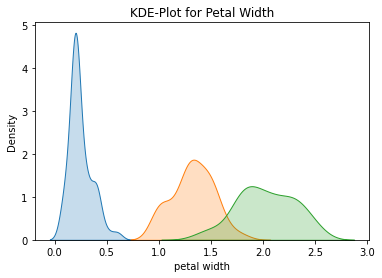

In [31]:
sns.kdeplot(df[df['class']=='Iris-setosa']['petal width'], shade=True, label = 'setosa')
sns.kdeplot(df[df['class']=='Iris-versicolor']['petal width'], shade=True, label = 'versicolor')
sns.kdeplot(df[df['class']=='Iris-virginica']['petal width'], shade=True, label = 'virginica')
plt.title('KDE-Plot for Petal Width')
plt.show()

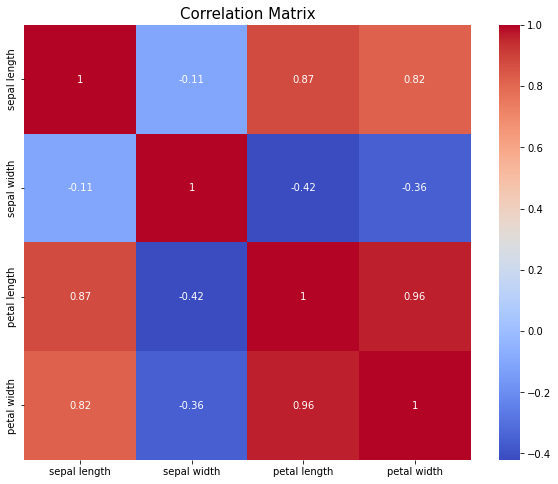

In [32]:
#Correlation Matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(df[:-1].corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Matrix',fontsize=15)
plt.show()

# Data Preprocessing

In [33]:
#Selecting the parameters which will be considered for training the model
X = df.drop(['class'],axis=1)
y = df['class']

In [34]:
X.head(3)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [35]:
y.head(3)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: class, dtype: object

In [36]:
#Spliting the train and test data using train_test_split
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [37]:
print('Shape of X_train : ',X_train.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (120, 4)
Shape of y_train :  (120,)
Shape of X_test :  (30, 4)
Shape of y_test :  (30,)


# Model Training

Training the model using Logistic Regression Algorithm

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
# We got 96.67% accuracy
lr.score(X_test,y_test)*100

96.66666666666667

In [40]:
#Predicting the test values
lrpred = lr.predict(X_test)
lrpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [41]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cmlr = confusion_matrix(y_test, lrpred)
cmlr = pd.DataFrame(cmlr , index = ['setosa','versicolor','virginica'] , columns = ['setosa','versicolor','virginica'])
cmlr

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,8,1
virginica,0,0,8


Training the model using Decision Tree Classifier Algorithm

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
#We got 93.33% accuracy
dtc.score(X_test,y_test)

0.9666666666666667

In [44]:
#Predicting the test values
dtcpred = dtc.predict(X_test)
dtcpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [45]:
#Plotting the confusion matrix
cmdtc = confusion_matrix(y_test, dtcpred)
cmdtc = pd.DataFrame(cmdtc , index = ['setosa','versicolor','virginica'] , columns = ['setosa','versicolor','virginica'])
cmdtc

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,8,1
virginica,0,0,8


Training the model using Random Forest Classifier Algorithm

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =15, random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

In [47]:
# We got 96.67% accuracy
rfc.score(X_test,y_test)

0.9666666666666667

In [48]:
#Predicting the test values
rfcpred = rfc.predict(X_test)
rfcpred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [49]:
#Plotting the confusion matrix
cmrfc = confusion_matrix(y_test, rfcpred)
cmrfc = pd.DataFrame(cmrfc , index = ['setosa','versicolor','virginica'] , columns = ['setosa','versicolor','virginica'])
cmrfc

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,8,1
virginica,0,0,8
